# GLOBAL VARIABLES

In [33]:
DATA_PATH = "./Data/rocket_league_skillshots.data"

# LIBRARIES

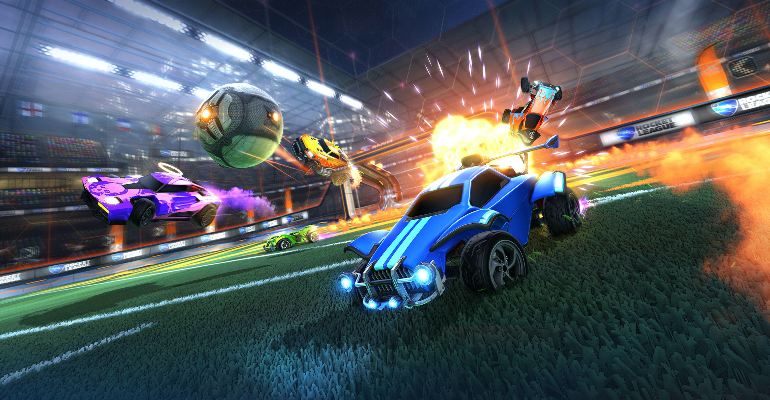

In [34]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
Image(filename='./Asset/RL.png') 

# **ABOUT THE DATA**
### Author: 
- Romain Mathonat - University de Lyon, CNRS, INSA Lyon (romain.mathonat@gmail.com)
- Citations: *Mathonat, R. (2020). Rocket League Skillshots [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5S035.*

### License: 
- This dataset is licensed under a **Creative Commons Attribution 4.0 International (CC BY 4.0)** license that is required upon being uploaded to **Kaggle**. \
*This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.*

### Source: 
- This dataset originated from the hit video game **'Rocket League'** where a football game is made up of cars!  

## **Collecting Data:**
This section explains the data collection process, including the source, permissions, and how the data was prepared.

### Steps:
1. Load the dataset.
2. Provide basic details about the dataset, such as columns and sample rows.
3. Explain the data source and its relevance.

In [35]:
#  Initial read
df_skillshot = pd.read_csv(DATA_PATH, sep=" ", header=None)

# Display basic information about the dataset
print("Dataset Shape:")
print(df_skillshot.values.shape)
print("Dataset Information:")
print(df_skillshot.info())

Dataset Shape:
(7191, 19)
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7191 non-null   object 
 1   1       6893 non-null   object 
 2   2       6893 non-null   object 
 3   3       6893 non-null   object 
 4   4       6893 non-null   object 
 5   5       6893 non-null   object 
 6   6       6893 non-null   object 
 7   7       6893 non-null   object 
 8   8       6893 non-null   object 
 9   9       6893 non-null   object 
 10  10      6893 non-null   object 
 11  11      6893 non-null   object 
 12  12      6893 non-null   object 
 13  13      6893 non-null   object 
 14  14      6893 non-null   object 
 15  15      6893 non-null   object 
 16  16      6893 non-null   object 
 17  17      6893 non-null   object 
 18  18      0 non-null      float64
dtypes: float64(1), object(18)
memory usage: 1.0+ MB
None


## **Exploring the Data:**
This section involves exploring the dataset to understand its structure, detect potential issues, and prepare it for analysis.

### Key Tasks:
1. Identify rows, columns, and general structure.
2. Check for duplicate or missing data
3. Examine the distribution of numerical and categorical columns.
4. Ensure data types are appropriate.

In [36]:
# Display the first few rows of the dataset
print("First few rows:")
print(df_skillshot.head())

# Dataset structure and duplicates
print(f"Dataset has {df_skillshot.shape[0]} rows and {df_skillshot.shape[1]} columns.")
duplicates = df_skillshot.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for missing values
missing_values = df_skillshot.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Analyze numerical columns
numerical_columns = df_skillshot.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns Summary:")
print(df_skillshot[numerical_columns].describe())

# Analyze categorical columns
categorical_columns = df_skillshot.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Column: {col}")
    print(df_skillshot[col].value_counts())


First few rows:
                   0                    1             2             3   \
0    BallAcceleration                 Time  DistanceWall  DistanceCeil   
1                   6                  NaN           NaN           NaN   
2  1636.7987723122642                  0.0       3498.01       2012.98   
3   3198.029396508704  0.13889319999999827       3494.08       2012.98   
4                 0.0   0.1736165000000014       3494.08       2012.98   

                   4                   5                   6    7   \
0        DistanceBall         PlayerSpeed           BallSpeed   up   
1                 NaN                 NaN                 NaN  NaN   
2   299.6682700921136  104267.42623178152   99035.84933750001    0   
3  229.89677966426592  124248.03198843835  102233.87873400871    0   
4  237.35059911447462  124248.03198843835  102968.35898954592    0   

           8     9     10    11     12      13    14     15     16    17  18  
0  accelerate  slow  goal  left  boost 

- There are a total of:
    + $19$ columns of **attributes**.
    + $7191$ rows of **entries**. 

## **Asking Meaningful Questions:**
This section defines the research questions that guide the analysis.

### Questions:
1. **What are the most common skillshots in Rocket League?**
2. **How does player performance vary across different skillshots?**
3. **What contextual factors (e.g., speed, ball position) are most critical for each skillshot?**

These questions aim to provide actionable insights for esports analytics and player skill evaluation.

## **Preprocessing and Analysis:**
In this section, data preprocessing and analysis are performed to answer each question.

### Workflow:
1. Preprocess the data for each research question.
2. Use visualization and statistical methods to analyze the data.
3. Present insights and findings.

### Example Analysis: Most Common Skillshots

In [37]:
# Attempt to split the single column into multiple columns based on whitespace
split_data = df_skillshot.iloc[:, 0].str.split(expand=True)
split_data.head()

# Assign meaningful column names based on observed structure and dataset context
columns = [
    "BallAcceleration", "Time", "DistanceWall", "DistanceCeil", 
    "DistanceBall", "PlayerSpeed", "BallSpeed", "up", "accelerate", 
    "slow", "goal", "left", "boost", "camera", "down", "right", "slide", "jump"
]
split_data.columns = columns

# Convert numeric columns to appropriate data types where possible
numeric_columns = [
    "BallAcceleration", "Time", "DistanceWall", "DistanceCeil", 
    "DistanceBall", "PlayerSpeed", "BallSpeed"
]
split_data[numeric_columns] = split_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns to integers for better interpretation
categorical_columns = ["up", "accelerate", "slow", "goal", "left", "boost", "camera", "down", "right", "slide", "jump"]
split_data[categorical_columns] = split_data[categorical_columns].apply(pd.to_numeric, errors='coerce')

# Display the cleaned dataset
split_data.head()


# Analyze the frequency of successful skillshots (goals)
goal_counts = split_data['goal'].value_counts()

# Display and visualize the results
print("Frequency of Goals (1 for success, 0 for no goal):")
print(goal_counts)

# Visualization
plt.figure(figsize=(6, 4))
goal_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Frequency of Goals")
plt.xlabel("Goal Status (0 = No Goal, 1 = Goal)")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

ValueError: Length mismatch: Expected axis has 1 elements, new values have 18 elements

## **Reflection:**
Each team member reflects on the project.

### Prompts for self-reflection:
- What were the key challenges faced?
- What did you learn from this project?
- If given more time, what would you improve?

### Example Reflections:
- **Challenges**: Synchronizing data formats, interpreting game-specific terminology.
- **Lessons Learned**: Advanced data preprocessing techniques, feature engineering in esports analytics.
- **Future Improvements**: Incorporate real-time data streams, expand the dataset to include professional players.


## **References:**
This section lists the materials and resources consulted for the project.

### Example References:
1. Mathonat, R., et al., *A Behavioral Pattern Mining Approach to Model Player Skills in Rocket League*, IEEE CoG 2020.
2. GitHub Repository: [Rocket League Skills Detection](https://github.com/Romathonat/RocketLeagueSkillsDetection)
3. Documentation for Python libraries: pandas, matplotlib, seaborn.